In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
import seaborn as sb 
import numpy as np
import random
import cmdstanpy
import arviz as az

In [3]:
model = cmdstanpy.CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
print(result.diagnose())

Processing csv files: C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpdmj7l8ss\stan1-20220320135720_1.csv, C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpdmj7l8ss\stan1-20220320135720_2.csv, C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpdmj7l8ss\stan1-20220320135720_3.csv, C:\Users\Public\Documents\Wondershare\CreatorTemp\tmpdmj7l8ss\stan1-20220320135720_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [6]:
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

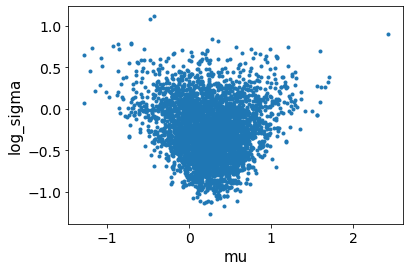

In [7]:
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

In [8]:
#Data read fromm coin.csv
df = pd.read_csv('coin.csv')
N = len(df.index)
y = df.Toss_Result

In [9]:
model = cmdstanpy.CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [10]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,13000.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,12000.0,1.0


In [11]:
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

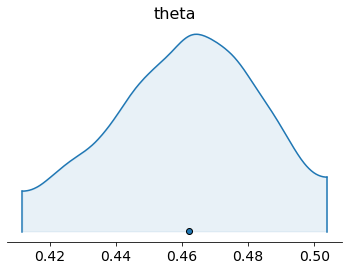

In [12]:
az.plot_density(arviz_result,shade=0.1)

In [13]:
df = pd.read_csv('coin.csv')
N = len(df.index)
y = df.Toss_Result

In [14]:
model = cmdstanpy.CmdStanModel(stan_file='stan3.stan')
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)
result.summary()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,80.00,0.02400,1.000,78.00,80.00,81.00,1800.0,630.0,1.0
mu,0.46,0.00043,0.024,0.42,0.46,0.50,3300.0,1100.0,1.0
sigma,0.50,0.00032,0.017,0.47,0.50,0.53,2900.0,1000.0,1.0
y_rep[1],0.46,0.00790,0.500,-0.36,0.46,1.30,4011.0,1388.0,1.0
y_rep[2],0.46,0.00780,0.500,-0.34,0.46,1.30,4098.0,1418.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[414],0.46,0.00800,0.510,-0.38,0.45,1.30,4065.0,1407.0,1.0
y_rep[415],0.47,0.00860,0.510,-0.36,0.48,1.30,3548.0,1228.0,1.0
y_rep[416],0.46,0.00790,0.510,-0.36,0.47,1.30,4167.0,1442.0,1.0


<AxesSubplot:xlabel='y / y_rep'>

D:\work\Anaconda\envs\data_sc\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


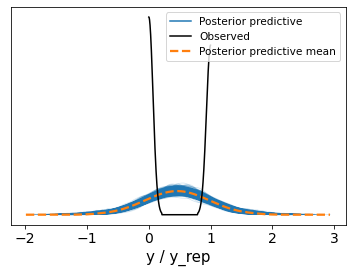

In [15]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})

In [16]:
model = cmdstanpy.CmdStanModel(stan_file='stan4.stan')
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [17]:
result.summary()
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

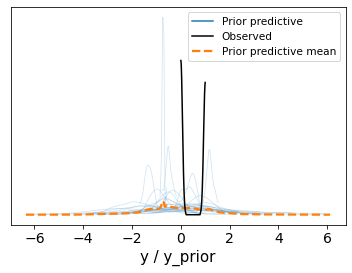

In [46]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   1.,   2.,   0., 

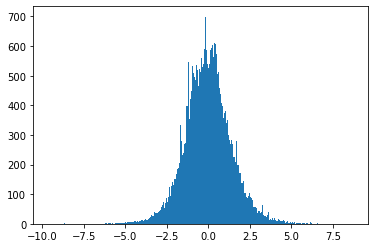

In [41]:
df = arviz_result.prior_predictive.to_dataframe()
plt.hist(df, bins = 1000)